In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("sample_submission.csv")

# Preview
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Train shape: (1460, 81)
Test shape: (1459, 80)

Missing values in training data:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


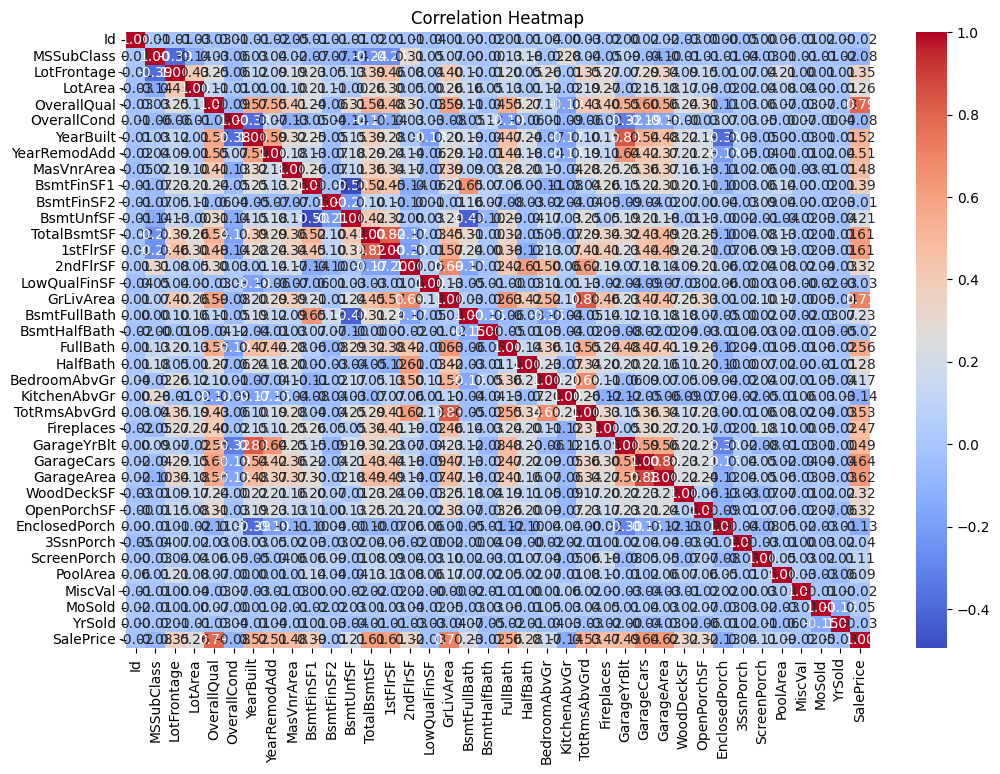

In [ ]:
# Step 4: Basic EDA
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nMissing values in training data:")
print(train_df.isnull().sum().sort_values(ascending=False).head(10))

# Visual correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Step 5: Feature Engineering
# Bathrooms = FullBath + 0.5 * HalfBath
train_df['Bathrooms'] = train_df['FullBath'] + 0.5 * train_df['HalfBath']
test_df['Bathrooms'] = test_df['FullBath'] + 0.5 * test_df['HalfBath']


In [ ]:
# Step 6: Feature Selection and Splitting
X = train_df[['GrLivArea', 'BedroomAbvGr', 'Bathrooms']]
y = train_df['SalePrice']

# Split train into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 7: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2848523443.419101
R² Score: 0.6286307301050608


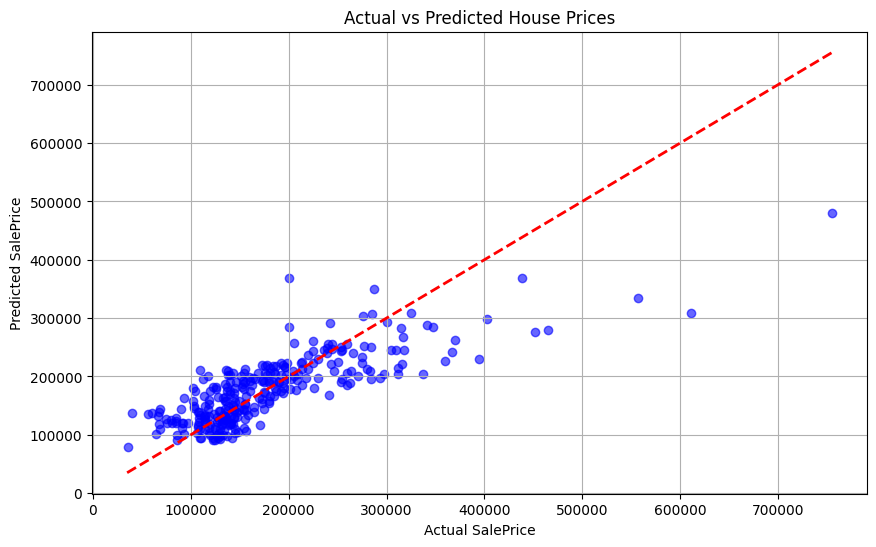

In [ ]:
# Step 8: Visualization – Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [ ]:
# Step 9: Predict on Test Set
X_test = test_df[['GrLivArea', 'BedroomAbvGr', 'Bathrooms']]
test_preds = model.predict(X_test)

# Step 10: Prepare Submission File
submission_df['SalePrice'] = test_preds
submission_df.to_csv("house_price_predictions.csv", index=False)

# Step 11: Download Submission File (Colab)
from google.colab import files
files.download("house_price_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

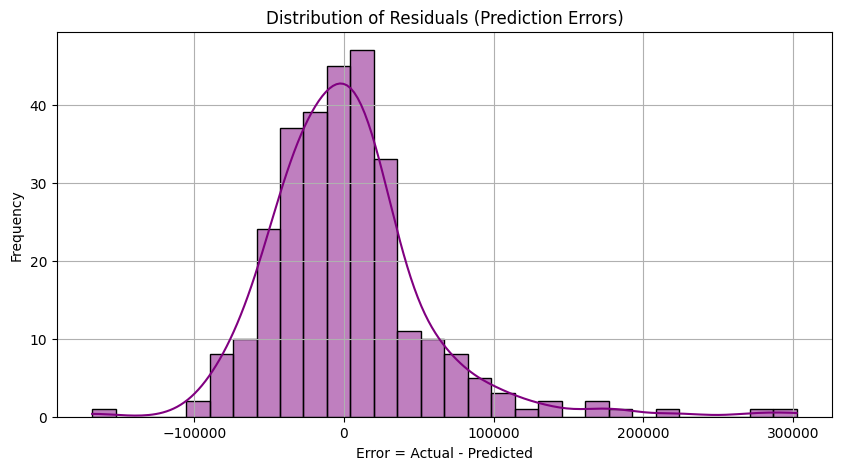

In [ ]:
residuals = y_val - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Error = Actual - Predicted")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


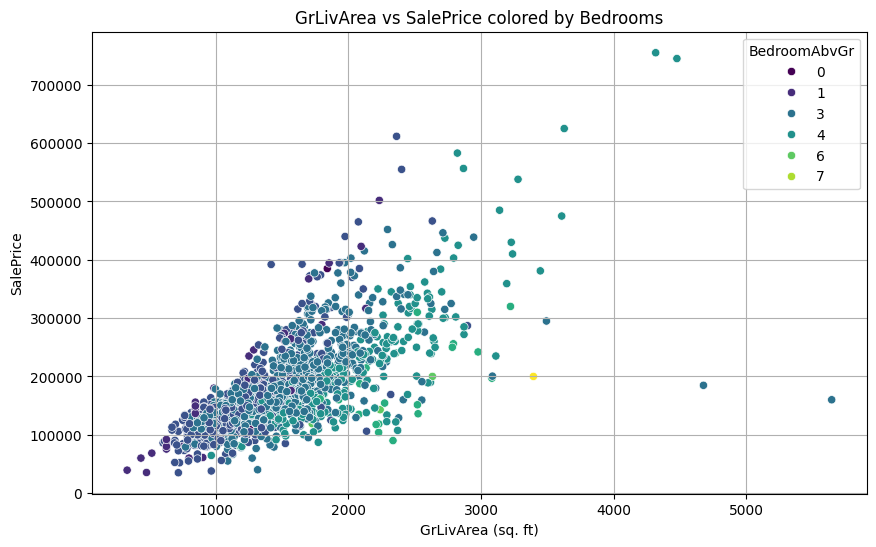

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], hue=train_df['BedroomAbvGr'], palette='viridis')
plt.title("GrLivArea vs SalePrice colored by Bedrooms")
plt.xlabel("GrLivArea (sq. ft)")
plt.ylabel("SalePrice")
plt.grid(True)
plt.show()


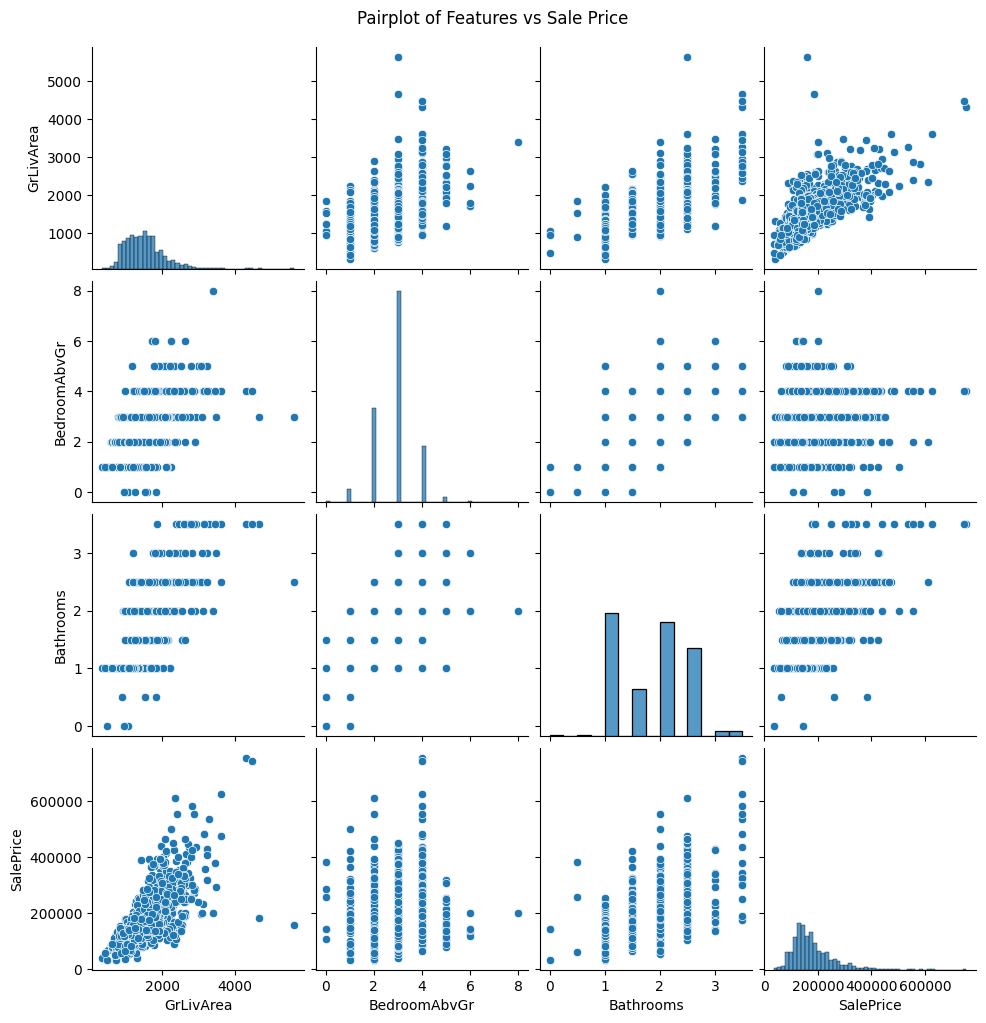

In [ ]:
sns.pairplot(train_df[['GrLivArea', 'BedroomAbvGr', 'Bathrooms', 'SalePrice']])
plt.suptitle("Pairplot of Features vs Sale Price", y=1.02)
plt.show()
